In [37]:
import sklearn as sk
import sklearn.covariance as cov
import pandas as pd
import numpy as np
from ggplot import *

train_original = pd.DataFrame.from_csv("cleaned_train.csv")
data = train_original.copy()

apply_price_log = True
log_method = np.log
exp_method = np.exp
if apply_price_log:
    data['SalePrice'] = data['SalePrice'].map(log_method) #'LOGLOGLO'
    
train = data.as_matrix()
names = data.columns

/usr/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


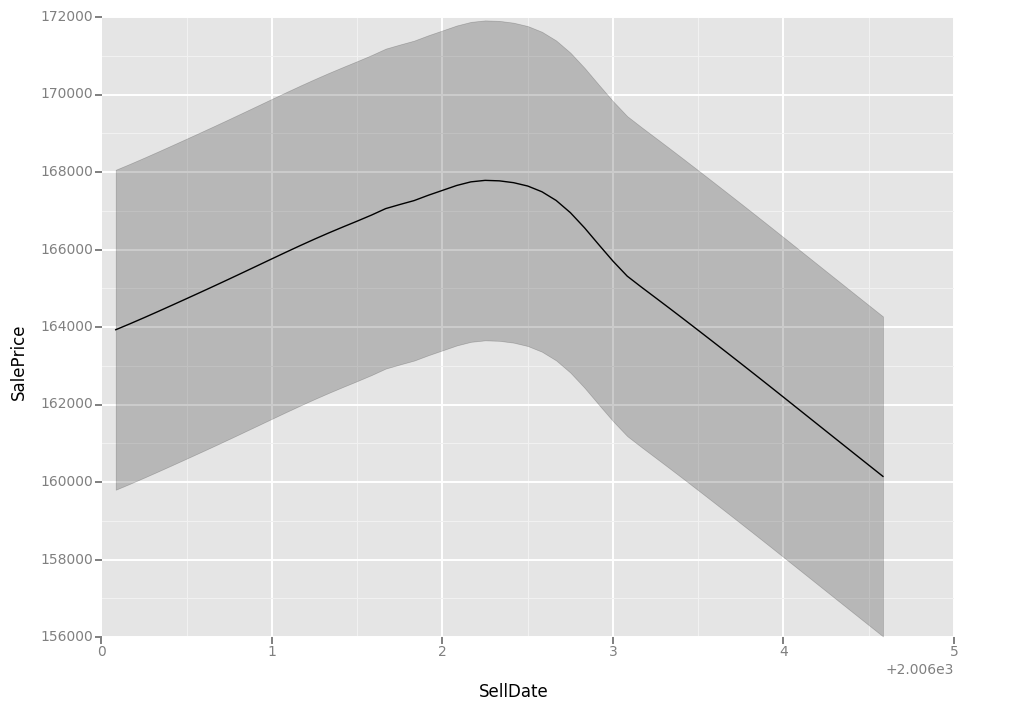

<ggplot: (8784456792012)>

In [54]:
ggplot(train_original,aes(x='SellDate',y='SalePrice')) + stat_smooth(method='lowess')

In [55]:
# Scale some features correctly
#data['OverallQual'] = train_original['OverallQual'].apply(lambda x:x**3)

# Drop features with low variance
import sklearn.feature_selection as sel

thredsh = sel.VarianceThreshold(threshold=0.0) # comparing with plots  0.003 seems to be a good threshold; no it doesn't. dont do it
thredsh.fit(train)
deselected = ~thredsh.get_support()
data = data.drop(names[deselected],axis=1)

# regenerate matrix
train = data.as_matrix()
names = data.columns

In [56]:
import sklearn.preprocessing as pre

# scale all
scaler = pre.RobustScaler()#StandardScaler sucks
train = scaler.fit_transform(train)

In [4]:
import sklearn.covariance as cov

lw = cov.LedoitWolf()
lw.fit(train)
cov_matrix = lw.covariance_

In [36]:
cor = np.corrcoef(cov_matrix)

relevance = cor[:,0]
sort = np.argsort(np.absolute(relevance))[::-1]
list(zip(relevance[sort],names[sort]))[:]

[(1.0, 'SalePrice'),
 (-0.015876679567010329, 'EnclosedPorch'),
 (-0.013502521647696103, 'MiscVal'),
 (-0.012453623628957607, 'PoolArea'),
 (-0.012068008110663928, 'LowQualFinSF'),
 (-0.010861440508013145, 'gen_loudness'),
 (-0.010806306560253038, 'BsmtQual'),
 (-0.01078762039548619, 'BsmtFinSF2'),
 (-0.01078520694928187, 'KitchenQual'),
 (-0.010740716054042344, 'ExterQual'),
 (-0.010740591191052576, 'GarageFinish'),
 (-0.010699242764244124, 'gen_total_porch'),
 (-0.010686180956335977, 'OverallCond'),
 (-0.010617968651692027, 'BsmtExposure'),
 (-0.010615544260483214, 'HeatingQC'),
 (-0.010612112118129629, 'MasVnrType None'),
 (-0.010586097015824174, 'gen_transport'),
 (-0.010580198604847426, 'Functional'),
 (-0.010563531980243464, 'PavedDrive'),
 (-0.01050381792370496, 'GarageType Detchd'),
 (-0.010501215669487371, 'ExMetalSd'),
 (-0.010492730158493344, 'LotArea'),
 (-0.010490790795888962, 'ExWdSdng'),
 (-0.010485707003475642, 'BsmtFinType1'),
 (-0.010474440525558815, 'FireplaceQu'),
 

In [57]:
# Correlation Control:
# check whether correlation should be positiv or negativ
# better results here with StandardScaler

pos_cor = ['SalePrice','LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
           'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','OverallQual',
           'OverallCond','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
          ]

neg_cor = ['Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC',
          'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageCond','PavedDrive',
           'PoolQC','Fence'
          ]

unsure_cor = ['BsmtExposure','BsmtUnfSF',  
                     'LowQualFinSF']

c = dict(zip(names,relevance))

for item in pos_cor:
    if c[item]<=0:
        print("Wrong correlation for",item,c[item])

for item in neg_cor:
    if c[item]>=0:
        print("Wrong correlation for",item,c[item])

NameError: name 'relevance' is not defined

In [58]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

labels = train[:,0]
features = train[:,1:]

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

In [102]:
# We learned: neural networks suck balls at predicting house prices. Don't use your brain when buing a house. As you tree.

#from sklearn import ensemble
#from sklearn import neural_network

    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
    #fitter = ensemble.RandomForestRegressor()
    #fitter = ensemble.GradientBoostingRegressor(n_estimators=1800,max_leaf_nodes=10,learning_rate=0.005, random_state=1337, loss='ls')
#fitter = neural_network.MLPRegressor(hidden_layer_sizes=(1000,), activation='logistic',solver='sgd', max_iter=500)
    
#scores = cross_val_score(fitter,features,labels,cv=10,scoring='neg_mean_squared_error',n_jobs=4)
#print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

In [59]:
from sklearn import ensemble


    #fitter = sk.linear_model.Ridge(alpha=alpha)
    #fitter = sk.linear_model.Lasso(alpha=alpha) #sk.svm.SVR(kernel="linear")
#fitter = ensemble.RandomForestRegressor(n_estimators=1000,max_depth=100,max_features="auto",n_jobs=4)
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=1800,max_leaf_nodes=15,learning_rate=0.005, random_state=78958, loss='ls')
 

scores = cross_val_score(fitter,features,labels,cv=12,scoring='neg_mean_squared_error',n_jobs=4)
print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

RMSE: -0.05989 (+/- 0.03681)


RMSE: -0.05971 (+/- 0.03689)


In [23]:
leaf_data = []
for i in range(13,21,1):
    fitter = ensemble.GradientBoostingRegressor(n_estimators=1800,max_leaf_nodes=i,learning_rate=0.005, random_state=78958, loss='ls')
    leaf_data.append(cross_val_score(fitter,features,labels,cv=12,scoring='neg_mean_squared_error',n_jobs=4))
print("RMSE: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

RMSE: -0.06051 (+/- 0.03695)


In [20]:
leaf_data

[array([-0.06756104, -0.04041107, -0.03727935, -0.07053836, -0.09556026,
        -0.08448058, -0.05109549, -0.07157497, -0.03452567, -0.05250224,
        -0.0542293 , -0.05638652]),
 array([-0.06756104, -0.04041107, -0.03727935, -0.07053836, -0.09556026,
        -0.08448058, -0.05109549, -0.07157497, -0.03452567, -0.05250224,
        -0.0542293 , -0.05638652]),
 array([-0.06756104, -0.04041107, -0.03727935, -0.07053836, -0.09556026,
        -0.08448058, -0.05109549, -0.07157497, -0.03452567, -0.05250224,
        -0.0542293 , -0.05638652]),
 array([-0.06756104, -0.04041107, -0.03727935, -0.07053836, -0.09556026,
        -0.08448058, -0.05109549, -0.07157497, -0.03452567, -0.05250224,
        -0.0542293 , -0.05638652])]

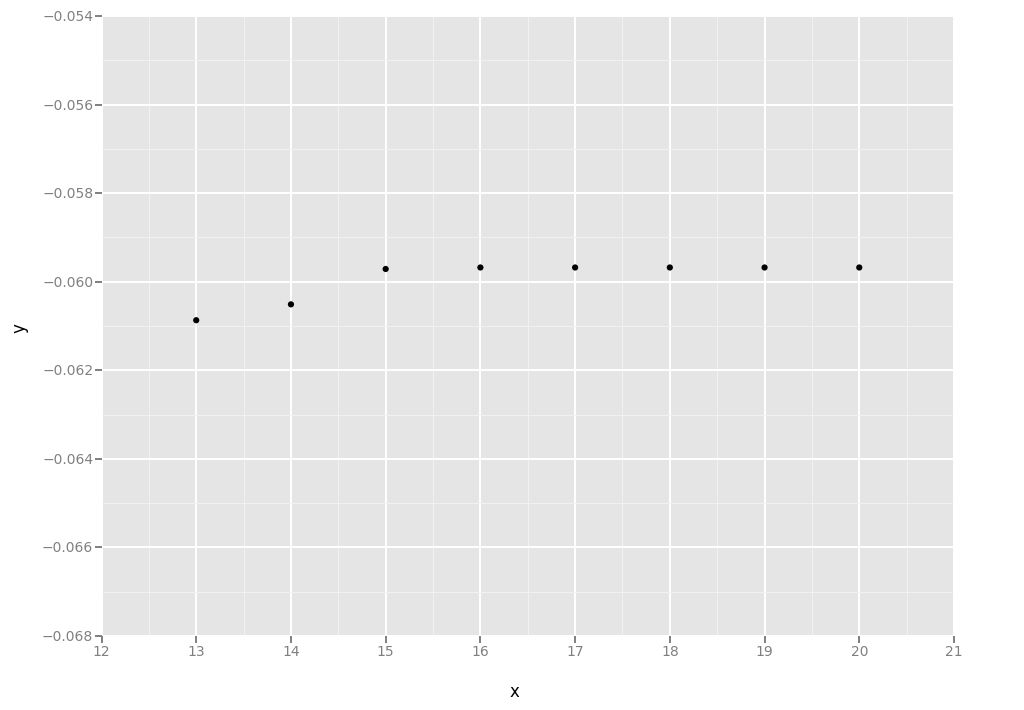

<ggplot: (-9223363252382129404)>

In [24]:
y = list(map(np.mean,leaf_data))
#y2 = list(map(np.mean,leaf_data))
x = list(range(13,21,1))
#x2 = list(range(30,50,5))
gg.qplot(x=x,y=y)

RMSE: -0.08878 (+/- 0.09474) (neue werte, kein log)
RMSE: -0.06129 (+/- 0.03523) (neue werte, log(preise))



In [60]:
fitter.fit(features,labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=15,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1800, presort='auto', random_state=78958,
             subsample=1.0, verbose=0, warm_start=False)

In [76]:
scores

array([-0.05586403, -0.07992262, -0.07036178, -0.0596062 , -0.21957572,
       -0.12277876, -0.09556179, -0.06971735, -0.05709294, -0.09561018,
       -0.08887457, -0.07808623])

In [22]:
data['gen_']

Index(['SalePrice', 'SellDate', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType ConLw', 'SaleType New', 'SaleType Oth', 'SaleType WD',
       'SaleCondition Abnorml', 'SaleCondition AdjLand',
       'SaleCondition Alloca', 'SaleCondition Family', 'SaleCondition Normal',
       'SaleCondition Partial'],
      dtype='object', length=233)

In [61]:
importance = fitter.feature_importances_
sort = np.argsort(importance)[::-1]
list(zip(importance[sort],names[1:][sort]))

[(0.081149554503668467, 'GrLivArea'),
 (0.067915684490492789, 'OverallQual'),
 (0.058621266797086069, 'LotArea'),
 (0.048055674480677234, 'OverallCond'),
 (0.042880440531460964, 'GarageArea'),
 (0.037221046208907385, 'gen_discount'),
 (0.034674818490202305, 'TotalBsmtSF'),
 (0.032639868080117582, 'GarageYrBlt'),
 (0.032623444757963097, 'YearBuilt'),
 (0.03216623599822576, 'SellDate'),
 (0.02890414510488739, 'nbh_score'),
 (0.028748076215960389, 'YearRemodAdd'),
 (0.025767042046996012, 'gen_nbrhd_multipliers'),
 (0.023204893726654127, 'BsmtFinSF1'),
 (0.022500820308484236, 'gen_total_porch'),
 (0.021543957143174686, '1stFlrSF'),
 (0.019870213531015011, 'KitchenQual'),
 (0.019848175218070231, 'Functional'),
 (0.01961713609923579, 'BsmtUnfSF'),
 (0.015803869452248015, 'Fireplaces'),
 (0.015471558661571643, 'WoodDeckSF'),
 (0.015246035871471718, 'BsmtExposure'),
 (0.013116727346008853, 'BsmtFinType1'),
 (0.012197235912071549, 'gen_loudness'),
 (0.012183289859921644, 'ExBrkFace'),
 (0.01197

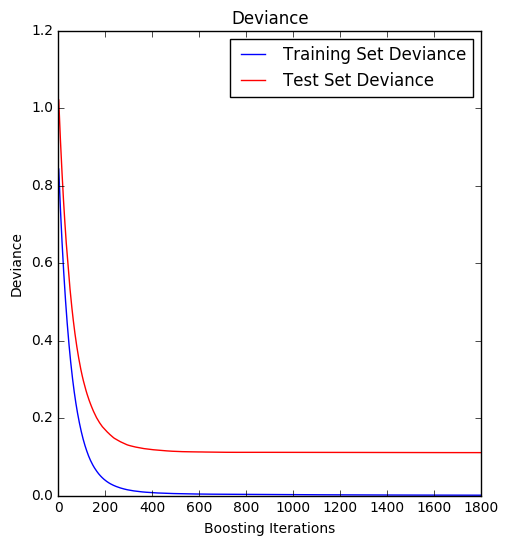

In [10]:
import matplotlib.pyplot as plt

n_est = 1800
fitter = ensemble.GradientBoostingRegressor(
    n_estimators=n_est,max_depth=6,learning_rate=0.01, random_state=1337, loss='ls')
fitter.fit(x_train,y_train)

test_score = np.zeros(n_est, dtype=np.float64)
for i, y_pred in enumerate(fitter.staged_predict(x_test)):
    test_score[i] = fitter.loss_(y_test, y_pred)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(n_est) + 1, fitter.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_est) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

array([-0.07815517, -0.11695183, -0.08638985, -0.15433835, -0.15930437,
       -0.1051224 , -0.08926952, -0.09329024, -0.17814508, -0.10443452])

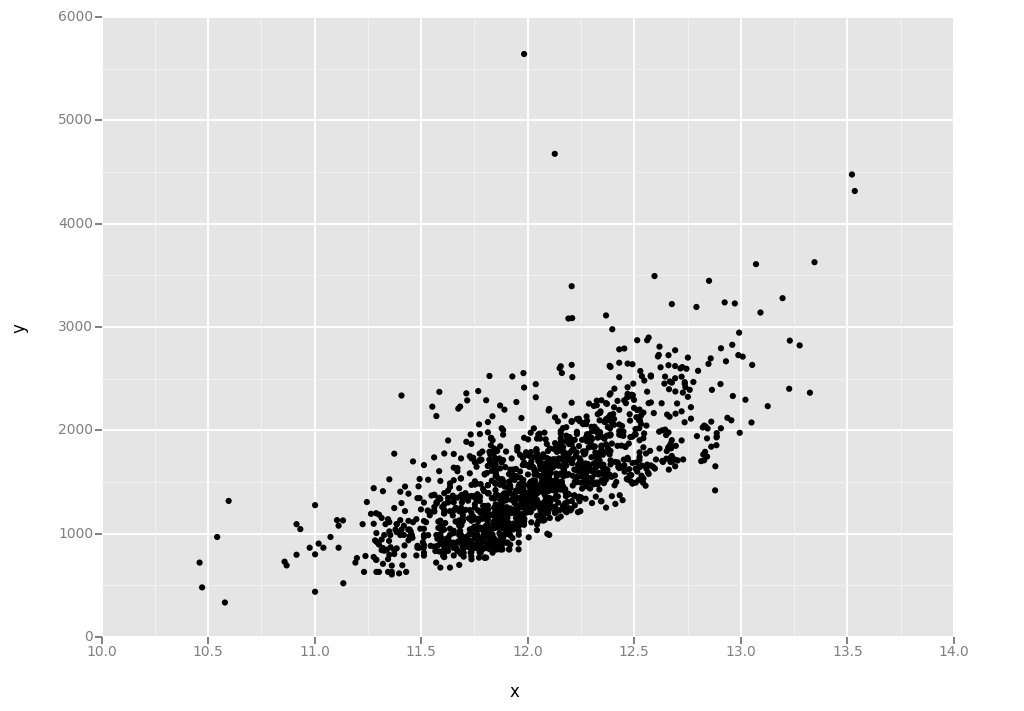

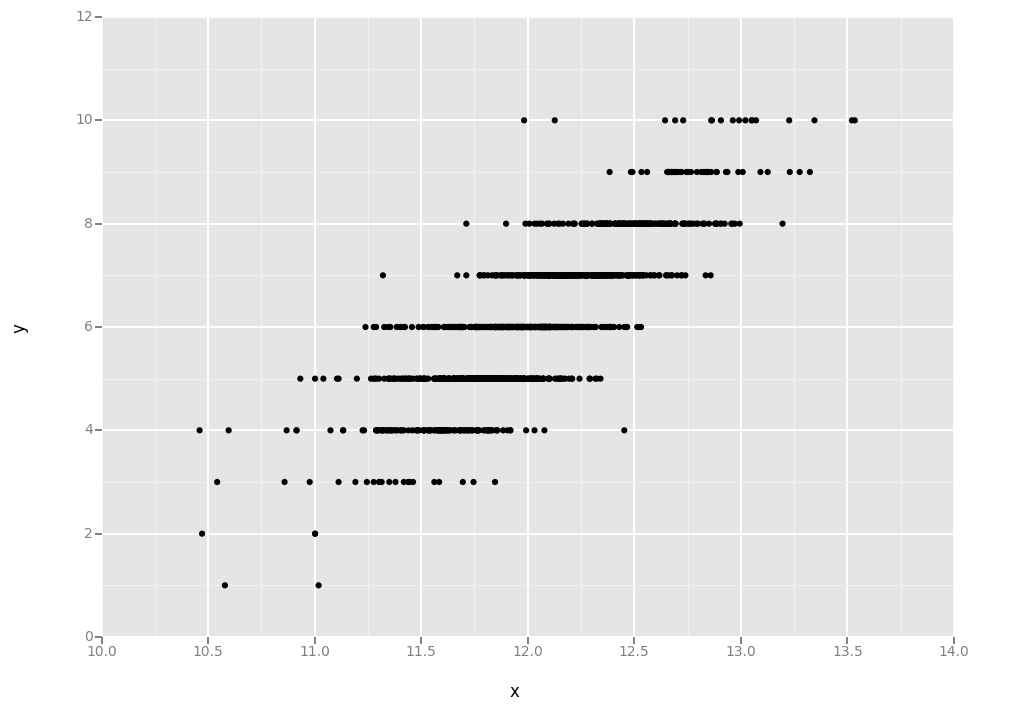

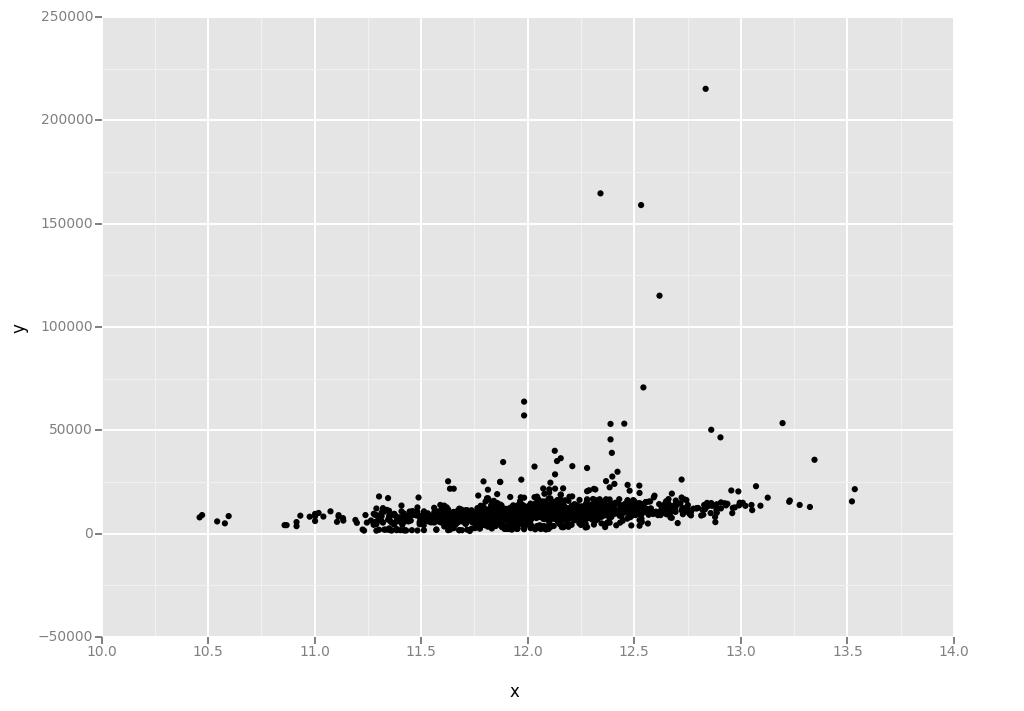

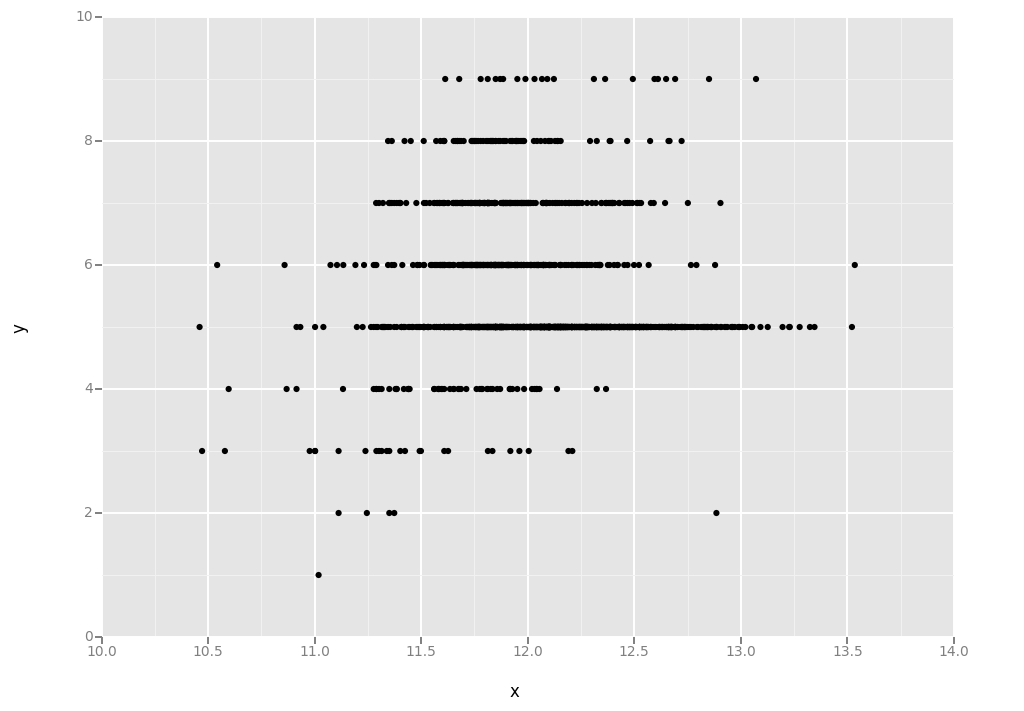

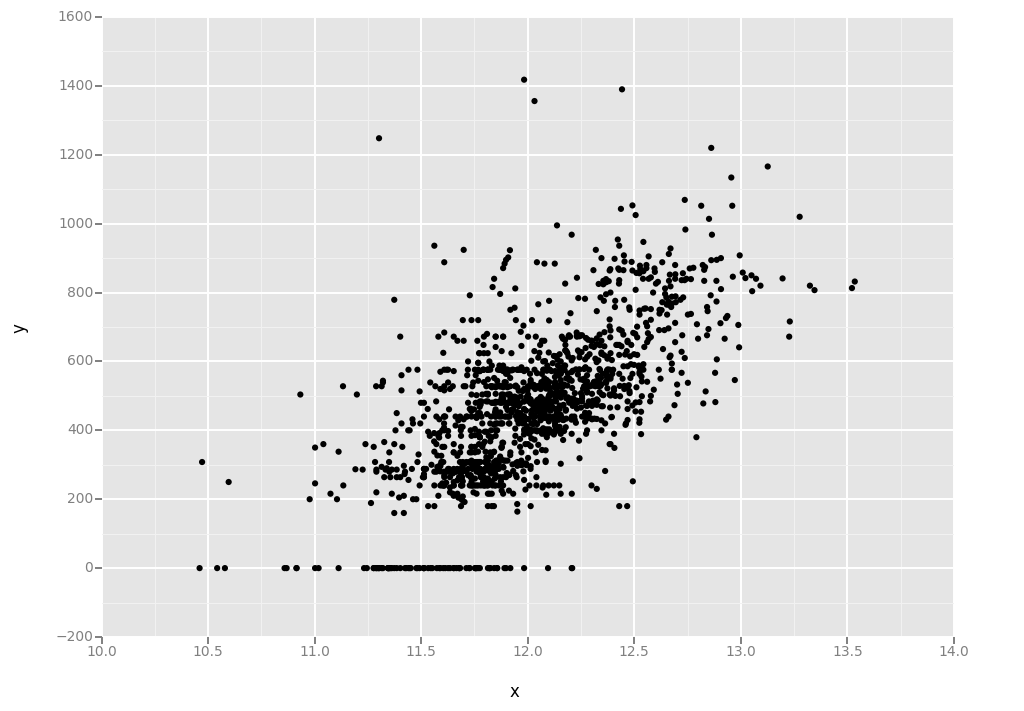

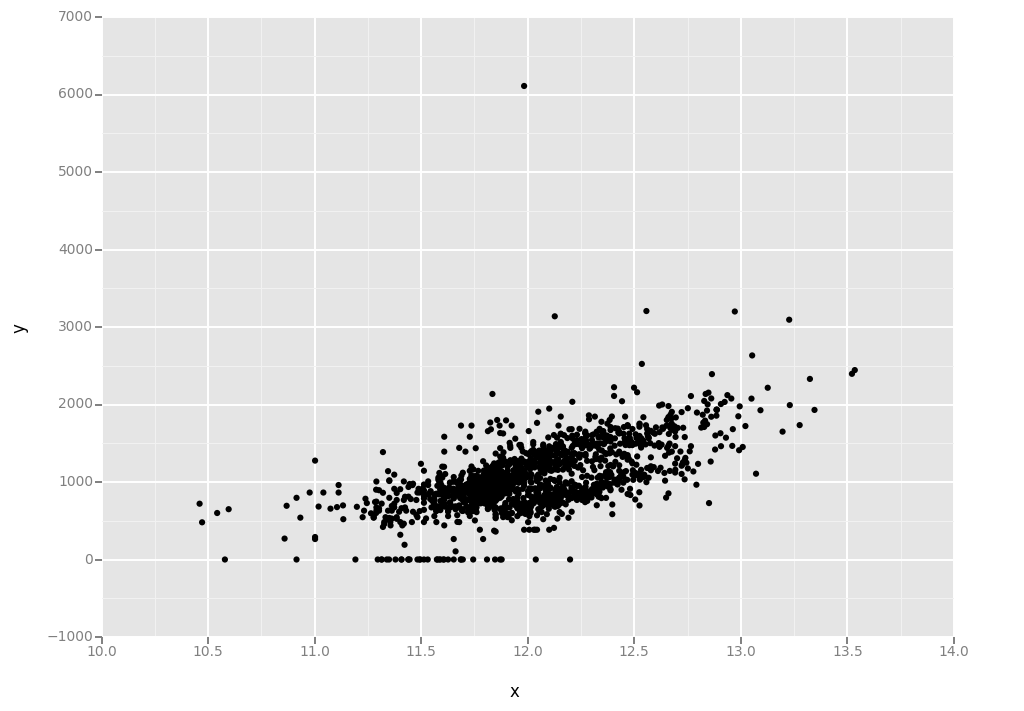

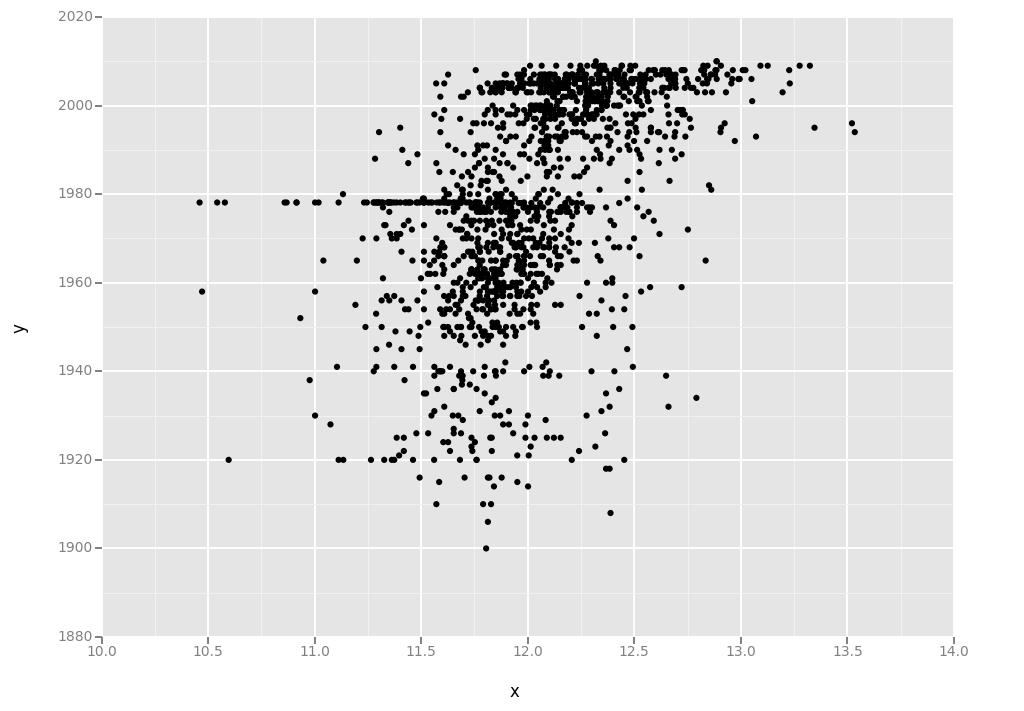

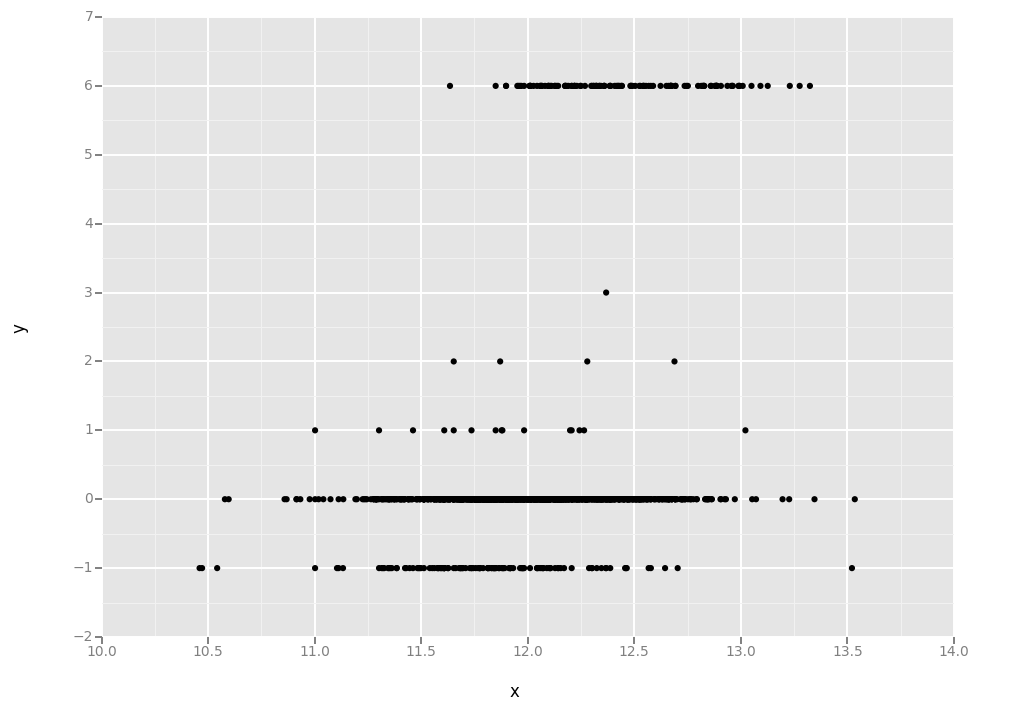

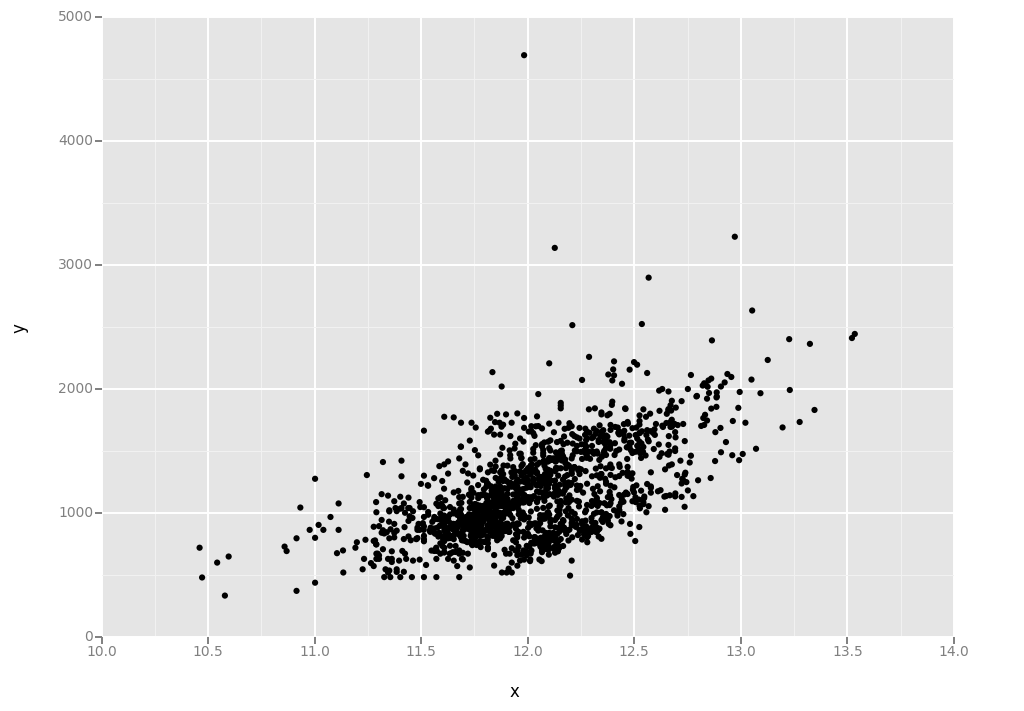

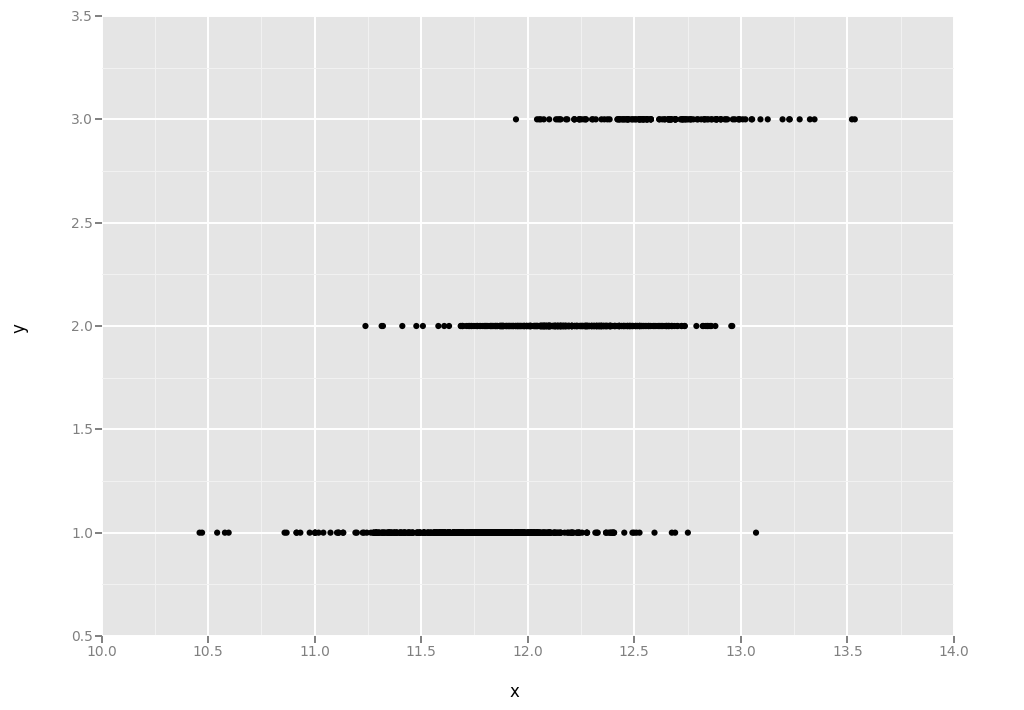

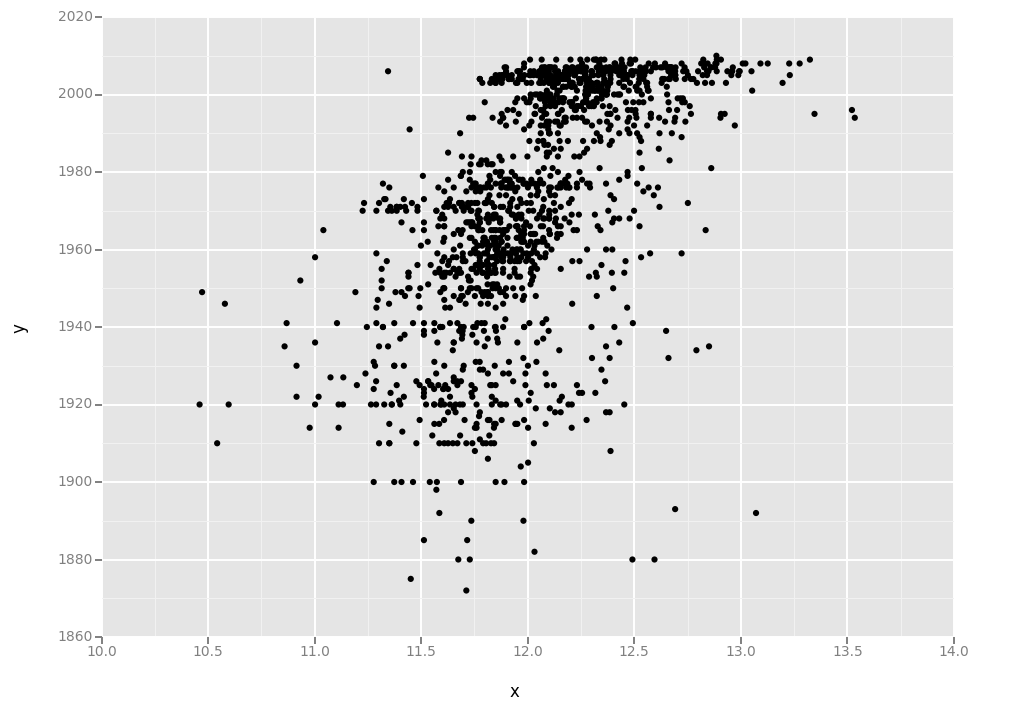

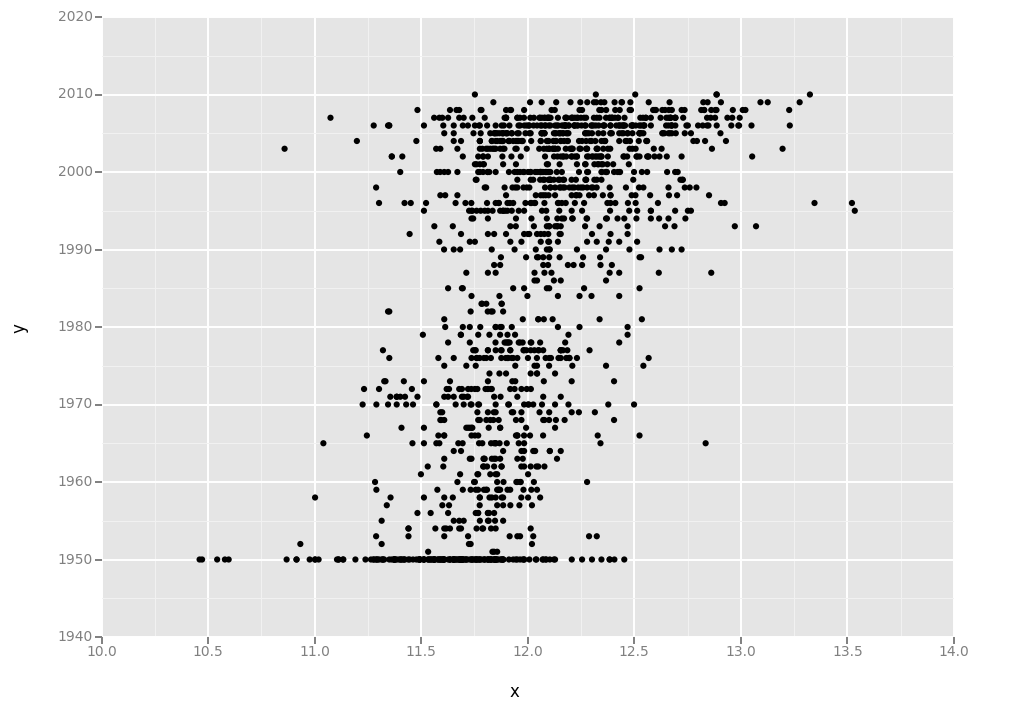

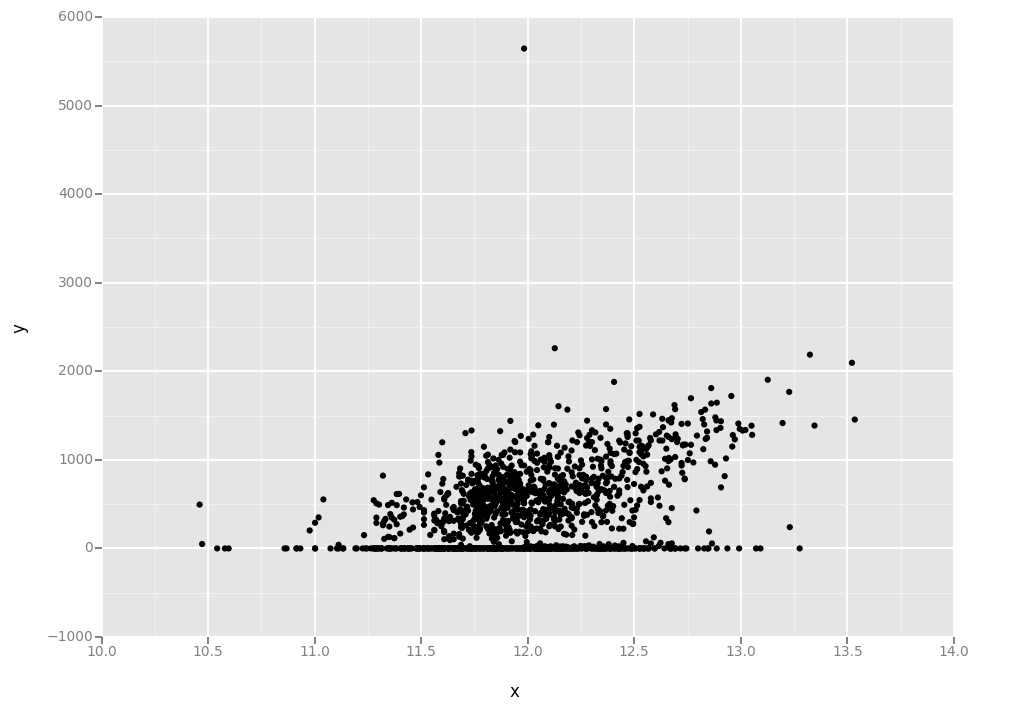

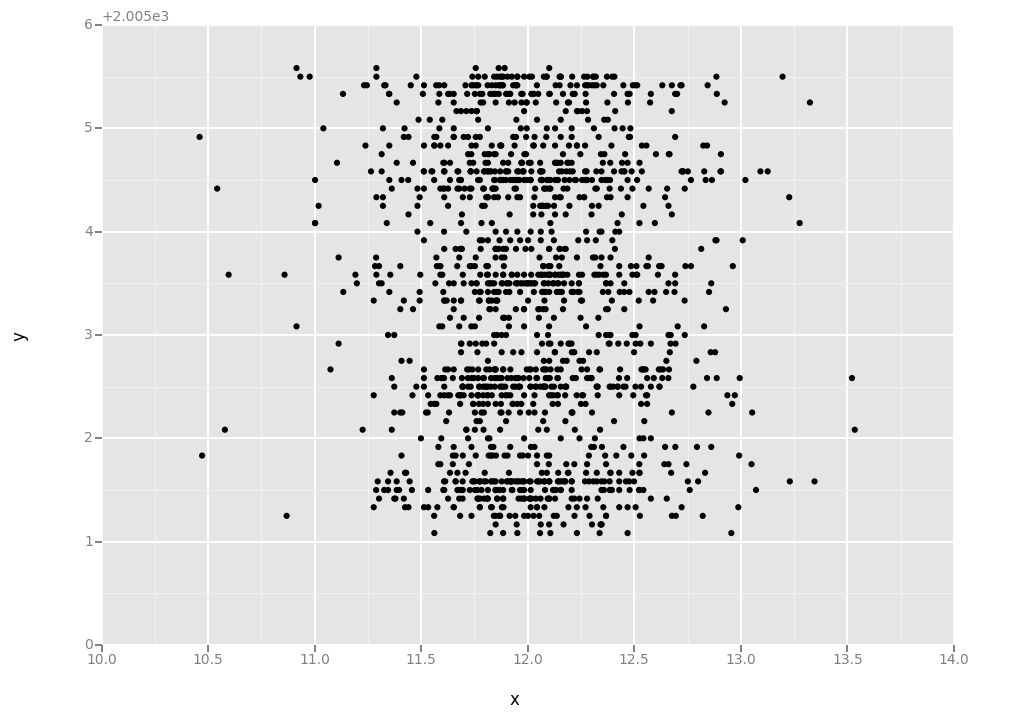

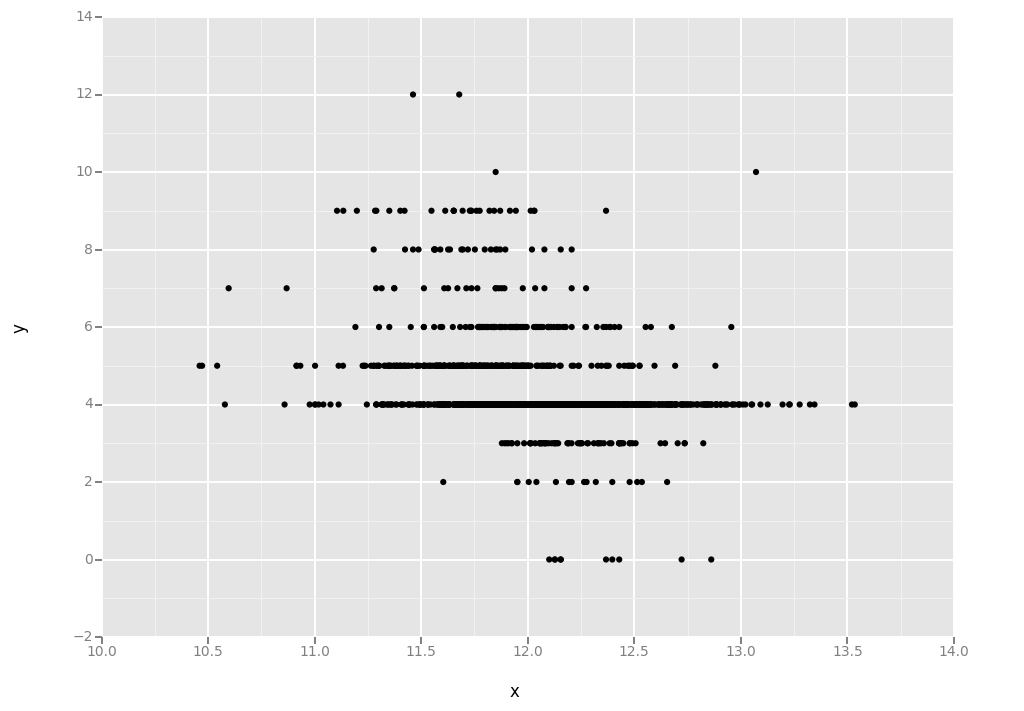

In [42]:
for i in names[1:][sort][:15]:
    gg.qplot(x=data['SalePrice'],y=data[i]).show()

In [11]:
from sklearn import ensemble

n = 11
alphas = range(1,10)
scores = [0]*n

for i,alpha in enumerate(alphas):
    fitter = ensemble.GradientBoostingRegressor(
    n_estimators=500,max_depth=int(alpha),learning_rate=0.005, random_state=1337)
    scores[i] = cross_val_score(fitter,features,labels,cv=4,scoring='neg_mean_squared_error',n_jobs=4).mean()
    print(alpha,scores[i])
    
print(max(scores))
gg.qplot(x=alphas,y=scores) + gg.scale_x_log()
    #print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

1 -0.284705698934
2 -0.176482944385
3 -0.142138395618
4 -0.129329703606
5 -0.125919828625
6 -0.123687631237
7 -0.129590429946
8 -0.142704992884
9 -0.14982422018
0


ValueError: Length of values does not match length of index

In [28]:
to_predict = pd.DataFrame.from_csv("cleaned_test.csv")
# apply transformations
to_predict = to_predict.drop(train_original.columns[deselected],axis=1)
to_predict_matrix = to_predict.as_matrix()
to_predict_matrix = scaler.transform(to_predict_matrix)

In [29]:
features = to_predict_matrix[:,1:]
labels = fitter.predict(features)
prices = scaler.inverse_transform(np.insert(features,0,labels,axis=1))

In [30]:
to_predict['SalePrice'] = prices
if apply_price_log:
    to_predict['SalePrice'] = to_predict['SalePrice'].map(exp_method)
to_predict[['SalePrice']].to_csv("submission.csv")

In [31]:
to_predict[['SalePrice']]

,SalePrice
Id,
1461,118046.973432
1462,164192.090506
1463,188531.996711
1464,187792.555178
1465,194379.674009
1466,175140.929468
1467,168214.534240
1468,169285.248299
1469,189808.848909
